In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kaggle_train = pd.read_csv('train.csv')
print(kaggle_train.columns)

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')


array([[<AxesSubplot:title={'center':'profile pic'}>,
        <AxesSubplot:title={'center':'nums/length username'}>,
        <AxesSubplot:title={'center':'fullname words'}>],
       [<AxesSubplot:title={'center':'nums/length fullname'}>,
        <AxesSubplot:title={'center':'name==username'}>,
        <AxesSubplot:title={'center':'description length'}>],
       [<AxesSubplot:title={'center':'external URL'}>,
        <AxesSubplot:title={'center':'private'}>,
        <AxesSubplot:title={'center':'#posts'}>],
       [<AxesSubplot:title={'center':'#followers'}>,
        <AxesSubplot:title={'center':'#follows'}>,
        <AxesSubplot:title={'center':'fake'}>]], dtype=object)

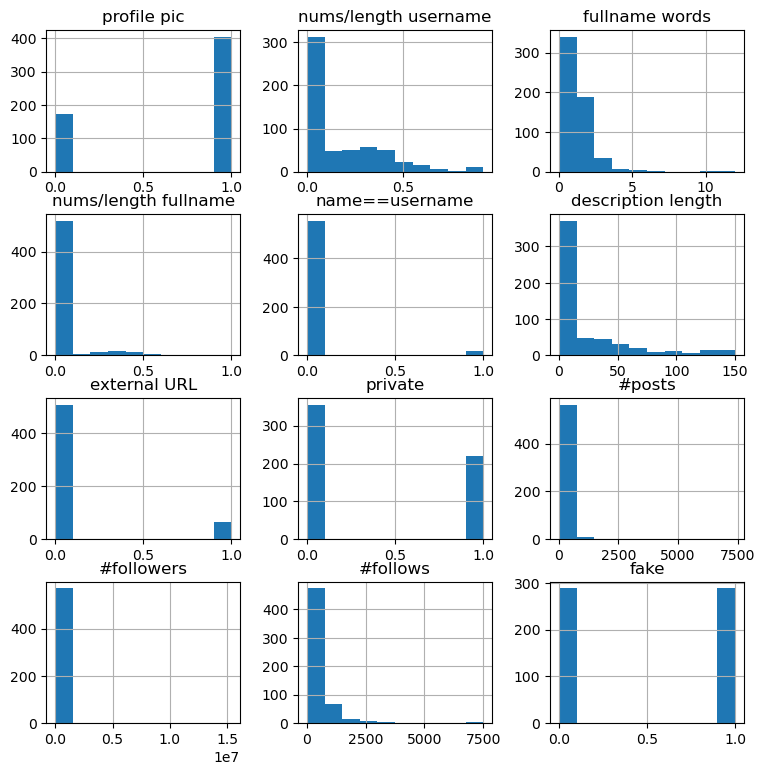

In [3]:
kaggle_train.hist(figsize=(9, 9))

In [6]:
kaggle_train_mod = kaggle_train
print(kaggle_train_mod.shape)

(576, 12)


In [7]:
kaggle_train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [8]:
kaggle_train_mod.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [9]:
# Features/Response
feature_names = ['profile pic', 
                 'nums/length username', 
                 'fullname words', 
                 'nums/length fullname', 
                 'name==username', 
                 'description length', 
                 'external URL', 
                 'private',
                '#posts',
                '#followers',
                '#follows']
X = kaggle_train_mod[feature_names]
y = kaggle_train_mod.fake

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB



from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [61]:
# Initial model selection process
models = []

for n in range(1,20):
    models.append(('KNN-'+str(n), KNeighborsClassifier(n_neighbors=n, weights='distance',metric='cosine')))

#models.append(('KNN', KNeighborsClassifier(n_neighbors=9, weights='distance',metric='manhattan')))

In [62]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = kaggle_train_mod.fake, random_state=0)

In [63]:
names = []
scores = []
n = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    n.append(name.split('-')[1])

tr_split = pd.DataFrame({'Name': names, 'Score': scores,'N':n})
print(tr_split)

      Name     Score   N
0    KNN-1  0.798611   1
1    KNN-2  0.798611   2
2    KNN-3  0.798611   3
3    KNN-4  0.812500   4
4    KNN-5  0.798611   5
5    KNN-6  0.812500   6
6    KNN-7  0.826389   7
7    KNN-8  0.826389   8
8    KNN-9  0.833333   9
9   KNN-10  0.833333  10
10  KNN-11  0.819444  11
11  KNN-12  0.812500  12
12  KNN-13  0.812500  13
13  KNN-14  0.812500  14
14  KNN-15  0.812500  15
15  KNN-16  0.819444  16
16  KNN-17  0.812500  17
17  KNN-18  0.819444  18
18  KNN-19  0.819444  19


In [53]:
#Validation
kaggle_validation = pd.read_csv('test.csv')

In [54]:
print(kaggle_validation.shape)

(120, 12)


In [55]:
X_val = kaggle_validation.iloc[:, 0:-1]
Y_val = kaggle_validation.iloc[:, -1]

In [56]:
names_validation = []
scores_validation = []
n = []
for name, model in models:
    #model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    scores_validation.append(accuracy_score(Y_val, y_pred))
    names_validation.append(name)
    n.append(name.split('-')[1])

tr_split = pd.DataFrame({'Name': names_validation, 'Score': scores_validation,'N':n})
print(tr_split)

      Name     Score   N
0    KNN-1  0.775000   1
1    KNN-2  0.775000   2
2    KNN-3  0.808333   3
3    KNN-4  0.791667   4
4    KNN-5  0.866667   5
5    KNN-6  0.850000   6
6    KNN-7  0.850000   7
7    KNN-8  0.850000   8
8    KNN-9  0.850000   9
9   KNN-10  0.841667  10
10  KNN-11  0.850000  11
11  KNN-12  0.850000  12
12  KNN-13  0.858333  13
13  KNN-14  0.866667  14
14  KNN-15  0.875000  15
15  KNN-16  0.866667  16
16  KNN-17  0.883333  17
17  KNN-18  0.866667  18
18  KNN-19  0.866667  19


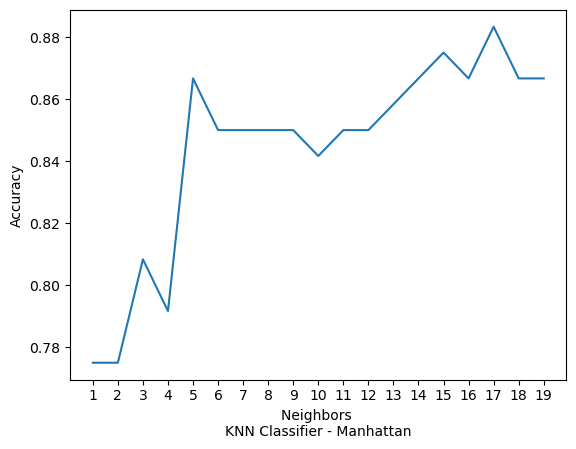

In [57]:
axis = sns.lineplot(x = 'N', y = 'Score', data = tr_split)
axis.set(xlabel='Neighbors \nKNN Classifier - Manhattan', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [26]:
strat_k_fold = StratifiedKFold(n_splits=10)

names = []
scores = []
n = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

      Name     Score
0    KNN-1  0.885572
1    KNN-2  0.885572
2    KNN-3  0.885511
3    KNN-4  0.890714
4    KNN-5  0.895826
5    KNN-6  0.901059
6    KNN-7  0.897550
7    KNN-8  0.906292
8    KNN-9  0.902753
9   KNN-10  0.907925
10  KNN-11  0.909679
11  KNN-12  0.909649
12  KNN-13  0.906171
13  KNN-14  0.906201
14  KNN-15  0.909679
15  KNN-16  0.904446
16  KNN-17  0.902722
17  KNN-18  0.904446
18  KNN-19  0.907925


In [ ]:
# Validation
